In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [12]:
# Load spreadsheet
xl = pd.ExcelFile('dataset_made.xlsx')

# Load a sheet into a DataFrame by name: df1
df = xl.parse('Sheet2')

In [16]:
df.tail()

,country,year,gdp_nominal - US$MM,gdp_per capita (usd),population,host_y,host_n,Index of Economic Freedom,no_of_internet_users,Gender gap index,number_sports_schools,Sports_budget- millions,Sports trainees,Rank,Olympics,GOLD,SILVER,BRONZE,total_No_of_medals
100,CRO,2000,21774.0,10582.668170,4505533,0,1,NaN,3063044,714.5,NaN,NaN,NaN,NaN,Summer,1,0,1,2
101,CUB,2000,NaN,6115.593942,11104313,0,1,NaN,4449238,716.9,NaN,NaN,NaN,NaN,Summer,11,11,7,29
102,NZL,2000,54138.0,21895.155980,3858032,0,1,NaN,4123439,751.0,NaN,NaN,NaN,NaN,Summer,1,0,3,4
103,CAN,2000,742319.0,32448.607640,30667365,0,1,NaN,32602776,716.5,NaN,NaN,NaN,NaN,Summer,3,3,8,14
104,IND,2000,476636.0,1648.208780,1053898107,0,1,NaN,500292635,601.1,NaN,NaN,NaN,NaN,Summer,0,0,1,1


In [20]:
df.columns

Index(['country', 'year', 'gdp_nominal - US$MM', 'gdp_per capita (usd)',
       'population', 'host_y', 'host_n', 'Index of Economic Freedom',
       'no_of_internet_users', 'Gender gap index', 'number_sports_schools',
       'Sports_budget- millions', 'Sports trainees', 'Rank', 'Olympics',
       'GOLD', 'SILVER', 'BRONZE', 'total_No_of_medals'],
      dtype='object')

In [21]:
df.shape

(105, 19)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 19 columns):
country                      105 non-null object
year                         105 non-null int64
gdp_nominal - US$MM          102 non-null float64
gdp_per capita (usd)         104 non-null float64
population                   105 non-null int64
host_y                       105 non-null int64
host_n                       105 non-null int64
Index of Economic Freedom    63 non-null float64
no_of_internet_users         105 non-null int64
Gender gap index             105 non-null float64
number_sports_schools        0 non-null float64
Sports_budget- millions      3 non-null float64
Sports trainees              0 non-null float64
Rank                         20 non-null float64
Olympics                     105 non-null object
GOLD                         105 non-null int64
SILVER                       105 non-null int64
BRONZE                       105 non-null int64
total_No_of_medals   

In [31]:
##columns dropped
df_new = df.iloc[:,np.r_[0:10,14:19]]

In [32]:
df_new.head()

,country,year,gdp_nominal - US$MM,gdp_per capita (usd),population,host_y,host_n,Index of Economic Freedom,no_of_internet_users,Gender gap index,Olympics,GOLD,SILVER,BRONZE,total_No_of_medals
0,USA,2016,18624475.0,59495.0,322179605,0,1,75.4,245436423,722.0,Summer,46,37,38,121
1,GBR,2016,2624529.0,43620.0,65788574,0,1,76.4,62354410,752.0,Summer,27,23,17,67
2,CHN,2016,11218281.0,16624.0,1403500365,0,1,52.0,746662194,676.0,Summer,26,18,26,70
3,RUS,2016,1527469.0,27890.0,146864513,0,1,50.6,110003284,691.0,Summer,19,17,19,55
4,GER,2016,3684816.0,50206.0,81914672,0,1,74.4,73436503,766.0,Summer,17,10,15,42


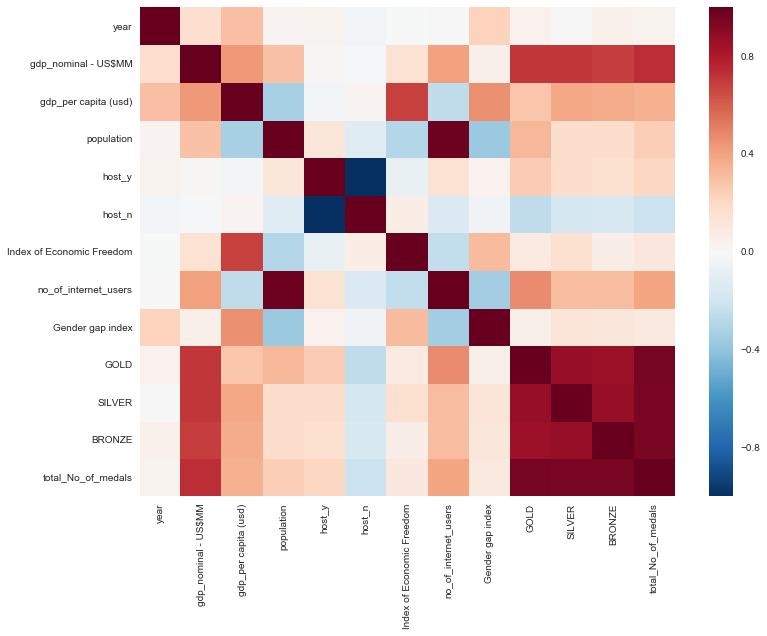

In [33]:
#correlation matrix
corrmat = df_new.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9);

In [37]:
corr=df_new.corr()["total_No_of_medals"]
corr

year                         0.032971
gdp_nominal - US$MM          0.740916
gdp_per capita (usd)         0.358122
population                   0.249202
host_y                       0.212756
host_n                      -0.212756
Index of Economic Freedom    0.108904
no_of_internet_users         0.392146
Gender gap index             0.100406
GOLD                         0.959320
SILVER                       0.952456
BRONZE                       0.947980
total_No_of_medals           1.000000
Name: total_No_of_medals, dtype: float64

In [ ]:
#plotting correlations

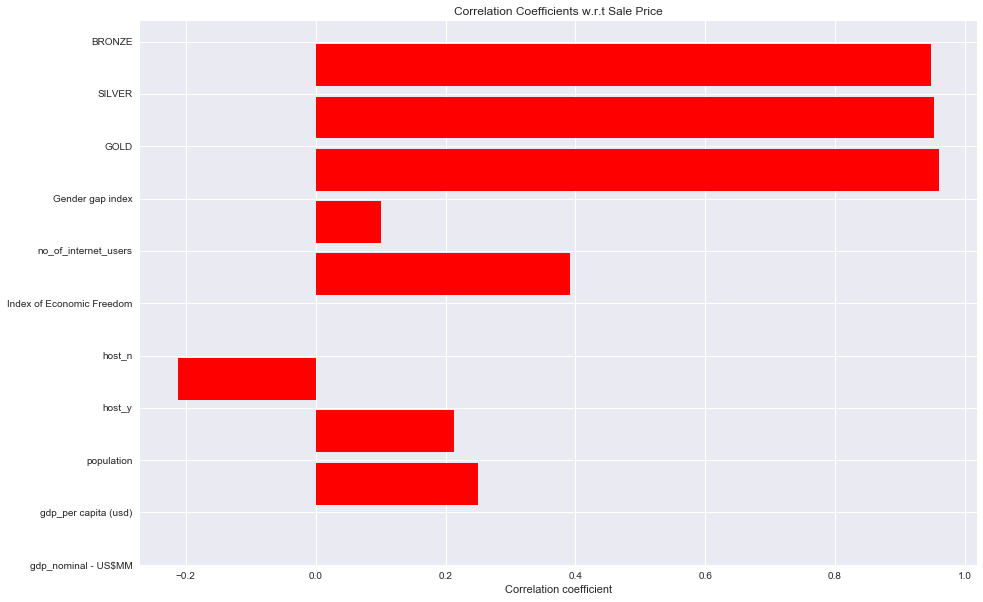

In [43]:
#plotting correlations
num_feat=df_new.columns[df_new.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(df_new[col].values, df_new.total_No_of_medals.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,10))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

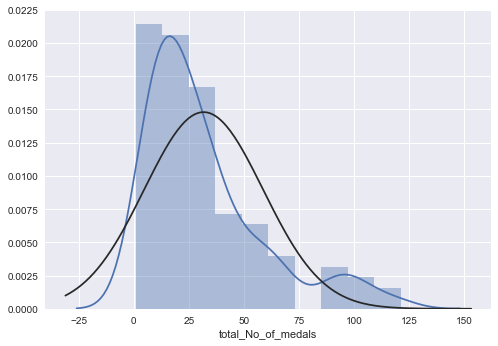

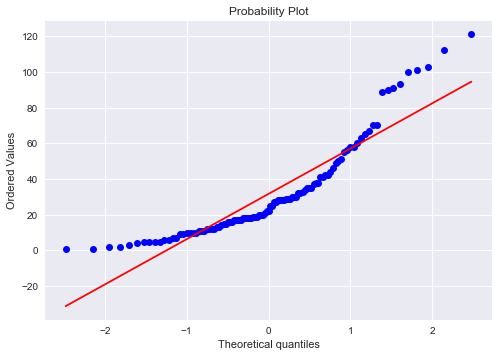

In [47]:
#Some data transformations
##Right Skewed
#histogram and normal probability plot
sns.distplot(df_new['total_No_of_medals'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_new['total_No_of_medals'], plot=plt)

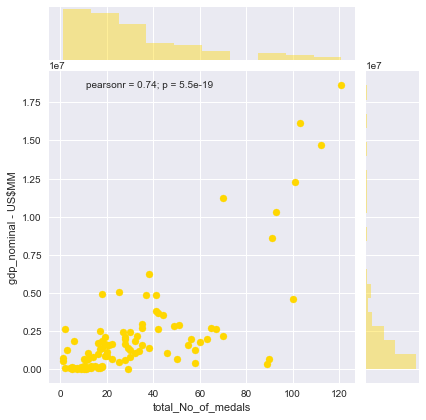

In [50]:
sns.jointplot(df_new['total_No_of_medals'],df_new['gdp_nominal - US$MM'],color='gold');

In [51]:
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
import statsmodels.formula.api as sm

In [53]:
null_counts = df_new.isnull().sum()
null_counts[null_counts > 0].sort_values

<bound method Series.sort_values of gdp_nominal - US$MM           3
gdp_per capita (usd)          1
Index of Economic Freedom    42
dtype: int64>

In [54]:
#Treating Missing Values
df_new['gdp_nominal - US$MM'].fillna(df_new['gdp_nominal - US$MM'].median(), inplace=True)

In [55]:
#Treating Missing Values
df_new['gdp_per capita (usd)'].fillna(df_new['gdp_per capita (usd)'].median(), inplace=True)

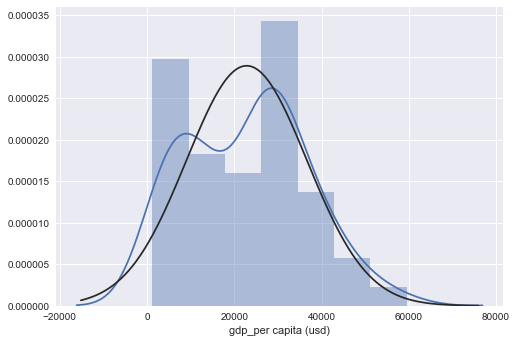

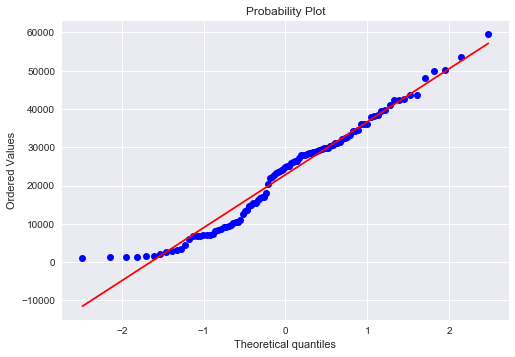

In [59]:
sns.distplot(df_new['gdp_per capita (usd)'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_new['gdp_per capita (usd)'], plot=plt)

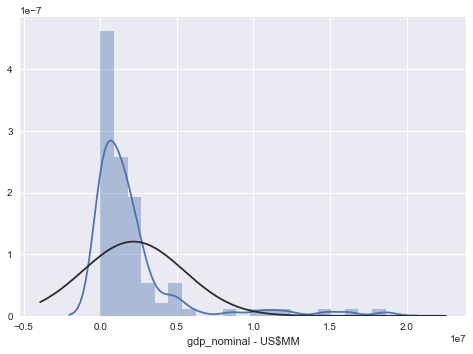

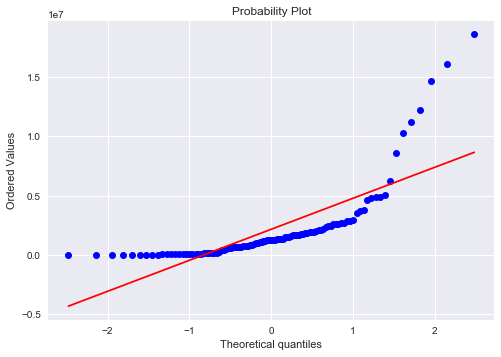

In [61]:
sns.distplot(df_new['gdp_nominal - US$MM'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_new['gdp_nominal - US$MM'], plot=plt)

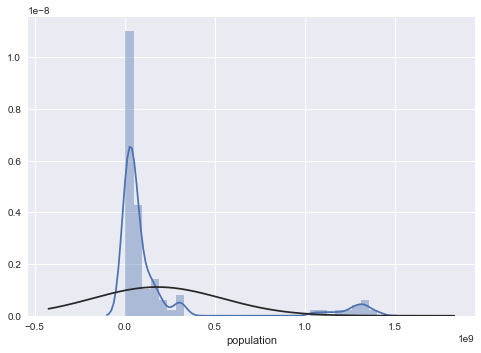

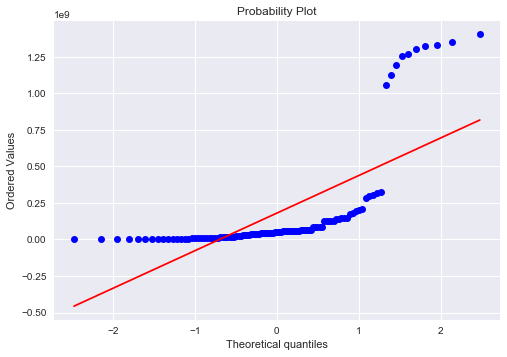

In [62]:
sns.distplot(df_new['population'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_new['population'], plot=plt)

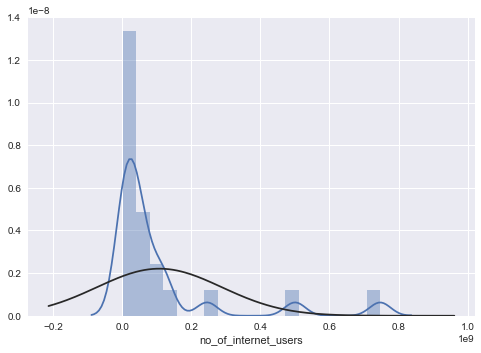

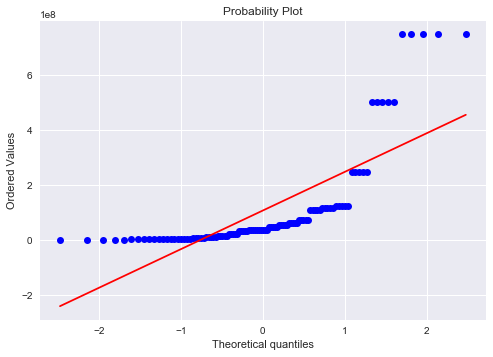

In [63]:
sns.distplot(df_new['no_of_internet_users'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_new['no_of_internet_users'], plot=plt)

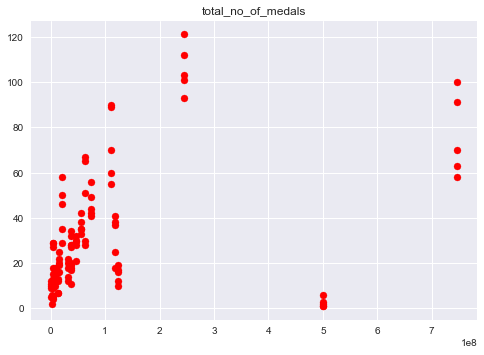

In [65]:
plt.scatter(df_new["no_of_internet_users"],df_new.total_No_of_medals, color='red')
plt.title("total_no_of_medals")

In [70]:
X = df_new[['no_of_internet_users','population','gdp_nominal - US$MM','gdp_per capita (usd)']] 
 

In [72]:
Y = df_new.iloc[:,-1]

In [77]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
import statsmodels.formula.api as sm

In [81]:
# with sklearn
regr = linear_model.LinearRegression()
x = regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 13.070931482726529
Coefficients: 
 [ 3.27468864e-07 -1.49657179e-07  3.29175957e-06  1.42670901e-04]


In [110]:
df_new.shape

(105, 15)

In [79]:
result = sm.OLS(Y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_No_of_medals   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     145.6
Date:                Sun, 16 Sep 2018   Prob (F-statistic):           5.20e-41
Time:                        16:34:09   Log-Likelihood:                -440.06
No. Observations:                 105   AIC:                             888.1
Df Residuals:                     101   BIC:                             898.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
no_of_internet_users  3.412e-07   5.23e-08      6.523      0.000    2.37e-07    4.45e-07
population           -1.452e-07   2.55e-08     -5.705      0.000   -1.96e-07   -9.47e-08
gdp_nominal - US$MM   2.488e-06   6.84e-07      3.636      0.000    1.13e-06    3.85e-06
gdp_per capita (usd)     0.0006   8.09e-05      7.296      0.000       0.000       0.001
==============================================================================
Omnibus:                       35.763   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.405
Skew:                           1.284   Prob(JB):                     7.74e-19
Kurtosis:                       6.531   Cond. No.                     2.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
df_new.columns

Index(['country', 'year', 'gdp_nominal - US$MM', 'gdp_per capita (usd)',
       'population', 'host_y', 'host_n', 'Index of Economic Freedom',
       'no_of_internet_users', 'Gender gap index', 'Olympics', 'GOLD',
       'SILVER', 'BRONZE', 'total_No_of_medals'],
      dtype='object')

In [159]:
df_new.columns
df_1 = df_new.iloc[:,np.r_[2:7,8:10]].values


In [160]:
###Backward elimination approach to make optimal model
X1 = np.append(arr = np.ones((105,1)).astype(int), values = df_1, axis = 1)

In [161]:
x_1 = X1[:,[0,1,2,3,4,5,6,7]]

In [162]:
reg_1 = sm.OLS(y,x_1).fit()
reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     40.74
Date:                Sun, 16 Sep 2018   Prob (F-statistic):           1.57e-24
Time:                        20:24:18   Log-Likelihood:                -429.22
No. Observations:                 105   AIC:                             872.4
Df Residuals:                      98   BIC:                             891.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8578     18.519     -0.262      0.794     -41.609      31.893
x1          3.492e-06   6.65e-07      5.248      0.000    2.17e-06    4.81e-06
x2          7.761e-05      0.000      0.524      0.601      -0.000       0.000
x3         -1.422e-07   2.35e-08     -6.047      0.000   -1.89e-07   -9.55e-08
x4             7.3376     10.885      0.674      0.502     -14.264      28.939
x5           -12.1954      9.139     -1.334      0.185     -30.331       5.940
x6          3.108e-07   4.87e-08      6.386      0.000    2.14e-07    4.07e-07
x7             0.0442      0.040      1.112      0.269      -0.035       0.123
==============================================================================
Omnibus:                       42.692   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.943
Skew:                           1.437   Prob(JB):                     7.40e-28
Kurtosis:                       7.506   Cond. No.                     2.92e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [164]:
#second model
x_2 = X1[:,[1,2,3,4,5,6,7]]
reg_2 = sm.OLS(y,x_2).fit()
reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     40.74
Date:                Sun, 16 Sep 2018   Prob (F-statistic):           1.57e-24
Time:                        20:25:14   Log-Likelihood:                -429.22
No. Observations:                 105   AIC:                             872.4
Df Residuals:                      98   BIC:                             891.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.492e-06   6.65e-07      5.248      0.000    2.17e-06    4.81e-06
x2          7.761e-05      0.000      0.524      0.601      -0.000       0.000
x3         -1.422e-07   2.35e-08     -6.047      0.000   -1.89e-07   -9.55e-08
x4             2.4798     28.972      0.086      0.932     -55.015      59.975
x5           -17.0532     27.101     -0.629      0.531     -70.835      36.728
x6          3.108e-07   4.87e-08      6.386      0.000    2.14e-07    4.07e-07
x7             0.0442      0.040      1.112      0.269      -0.035       0.123
==============================================================================
Omnibus:                       42.692   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.943
Skew:                           1.437   Prob(JB):                     7.40e-28
Kurtosis:                       7.506   Cond. No.                     1.22e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
#third model
x_3 = X1[:,[1,2,3,5,6,7]]
reg_3 = sm.OLS(y,x_3).fit()
reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     120.7
Date:                Sun, 16 Sep 2018   Prob (F-statistic):           2.93e-43
Time:                        20:26:50   Log-Likelihood:                -429.22
No. Observations:                 105   AIC:                             870.4
Df Residuals:                      99   BIC:                             886.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.489e-06   6.61e-07      5.277      0.000    2.18e-06     4.8e-06
x2          7.489e-05      0.000      0.521      0.604      -0.000       0.000
x3         -1.422e-07   2.34e-08     -6.083      0.000   -1.89e-07   -9.58e-08
x4           -19.2879      7.232     -2.667      0.009     -33.638      -4.938
x5          3.112e-07   4.82e-08      6.459      0.000    2.16e-07    4.07e-07
x6             0.0474      0.011      4.128      0.000       0.025       0.070
==============================================================================
Omnibus:                       42.752   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.691
Skew:                           1.441   Prob(JB):                     8.39e-28
Kurtosis:                       7.494   Cond. No.                     2.26e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [169]:
#fourth model
x_4 = X1[:,[1,3,5,6,7]]
reg_4 = sm.OLS(y,x_4).fit()
reg_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     145.9
Date:                Sun, 16 Sep 2018   Prob (F-statistic):           2.63e-44
Time:                        20:29:20   Log-Likelihood:                -429.37
No. Observations:                 105   AIC:                             868.7
Df Residuals:                     100   BIC:                             882.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.662e-06   5.69e-07      6.433      0.000    2.53e-06    4.79e-06
x2         -1.438e-07   2.31e-08     -6.223      0.000    -1.9e-07   -9.79e-08
x3           -19.5767      7.185     -2.725      0.008     -33.831      -5.323
x4          3.116e-07    4.8e-08      6.491      0.000    2.16e-07    4.07e-07
x5             0.0501      0.010      4.883      0.000       0.030       0.070
==============================================================================
Omnibus:                       40.730   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.745
Skew:                           1.389   Prob(JB):                     3.29e-25
Kurtosis:                       7.249   Cond. No.                     2.25e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
###splitting the data into trian and test set.
from sklearn.cross_validation import train_test_split

In [170]:
x = df_new[['no_of_internet_users','population','gdp_nominal - US$MM','host_n','Gender gap index']].values
y = df_new.iloc[:,-1].values

In [183]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [184]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train) 


In [189]:
X_test = sm.add_constant(X_test) 

In [190]:
X_test.shape

(21, 6)

In [186]:
result = sm.OLS(y_train,X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     54.80
Date:                Sun, 16 Sep 2018   Prob (F-statistic):           4.00e-24
Time:                        21:02:11   Log-Likelihood:                -334.49
No. Observations:                  84   AIC:                             681.0
Df Residuals:                      78   BIC:                             695.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2077     27.111     -0.192      0.848     -59.181      48.765
x1          2.842e-07   4.63e-08      6.135      0.000    1.92e-07    3.76e-07
x2         -1.291e-07   2.25e-08     -5.727      0.000   -1.74e-07   -8.42e-08
x3          4.062e-06   5.45e-07      7.452      0.000    2.98e-06    5.15e-06
x4           -17.7628      8.184     -2.170      0.033     -34.056      -1.470
x5             0.0532      0.036      1.481      0.143      -0.018       0.125
==============================================================================
Omnibus:                       36.243   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.855
Skew:                           1.314   Prob(JB):                     7.73e-28
Kurtosis:                       8.363   Cond. No.                     8.37e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.37e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
y_pred = result.predict(X_test)

In [192]:
y_pred  ##predicted values

array([54.02716413, 26.21944404, 89.6210354 ,  2.71751572, 32.96005767,
       35.71917759, 14.786562  , 15.38658297, 10.59431807, 34.24507028,
       28.23695175, 23.77783564, 23.08821424, 26.22671741, 24.60571967,
       25.23559706, 54.65946011, 35.79660368, 33.38749772, 25.80862128,
       37.7757303 ])

In [101]:
y_test

array([38, 20, 70,  3, 28, 35, 10,  2, 16, 60, 90, 11, 46, 17, 21, 35, 65,
       70, 17, 28, 51], dtype=int64)

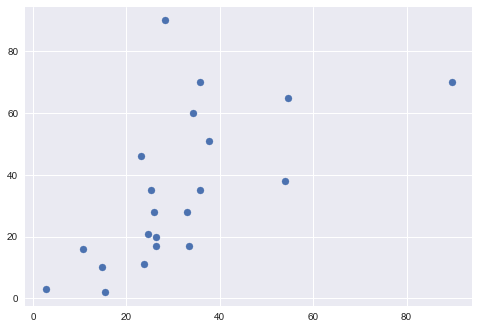

In [193]:
plt.scatter(result.predict(X_test),y_test)
plt.show()

In [197]:
##mean square error
np.mean((result.predict(X_test) - y_test)**2) 

381.99010100809846

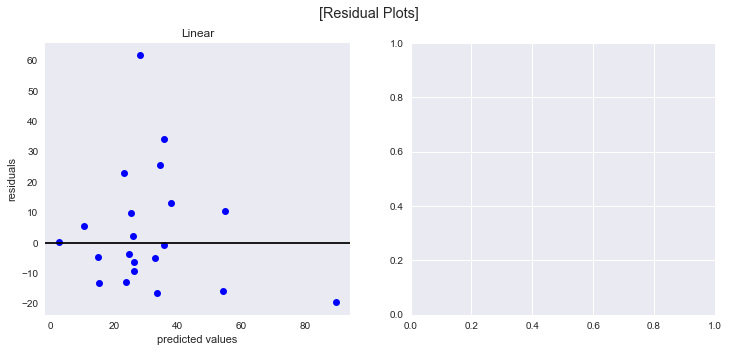

In [200]:

fig, axes = plt.subplots(1, 2, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes[0].plot(result.predict(X_test), y_test -result.predict(X_test), 'bo')
axes[0].axhline(y=0, color='k')
axes[0].grid()
axes[0].set_title('Linear')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')



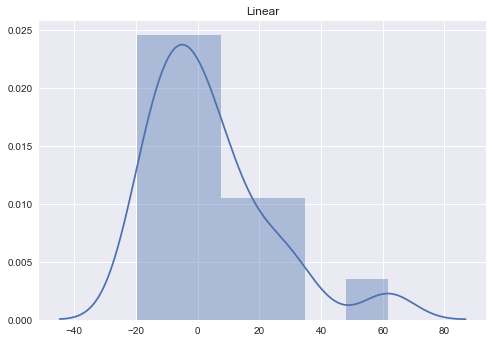

In [201]:
import seaborn as sns

residuals_linear = y_test - result.predict(X_test)

sns.distplot(residuals_linear);
plt.title('Linear')

In [202]:
from scipy.stats import normaltest
normaltest(residuals_linear)

NormaltestResult(statistic=11.255571735352293, pvalue=0.003596529710739868)